# Calcium-imaging spike detection 
--------

Example notebook for calcium-imaging data analysis in fused organoids. 

The aim of this notebook is to take traces which have been extracted with [CaImAn](https://github.com/flatironinstitute/CaImAn) and have been cleaned for empty traces and then stored as a pickle file. 

This script reads in .pickle files, finds peaks using the peaks_with function and gives out the following lists: 
> 1. Frequency per trace (/neuron)
> 2. peak_width per trace per peak (cumulative list for a recording, no neuron ID)

**load libraries**

In [1]:
import os

os.chdir('../..')

from fused_org_ephys import FusedOrgCa

## Load calcium-imaging traces
---- 

First, initialize the ```FusedOrgCa``` class and load a calcium trace processed with [CaImAn](https://github.com/flatironinstitute/CaImAn) for a single field-of-view (FOV) from a fusion organoid. Details on the processing with CaImAn can be found [here](https://github.com/mzabolocki/fusion_org_ephys/tree/main/analysis/gcamp). 

The class will automatically conduct signal normalizations and baseline subtractions. 

In [31]:
ca = FusedOrgCa(traces_fname='tests/test_data/gcamp/test_traces.pickle', prominence=0.4, rel_height=0.99)

Next, detect calcium peaks and widths. 

By default, peaks are detected using a prominence of 0.4, and widths with a rel_height of 0.99. However, these parameters can be changed to improve detections. 

In [32]:
ca.ca_peaks[0] # Peaks for neuron 0

array([ 570,  962, 1230, 1867, 2439, 3005, 3276, 4155, 4361, 4903, 5423])

In [33]:
ca.ca_widths[0]

array([ 88.74956445,  79.75703855,  97.75331727,  79.76729899,
        96.67942739, 109.666305  ,  88.73515438,  79.73588169,
        83.74287283,  85.75604268, 115.71874225])

Plot the detected peaks for each neuron. 

Save the traces to a save folder with a select file name. 

The directory already exists for figures/
saving to: figures/neuron_0.pdf
saved


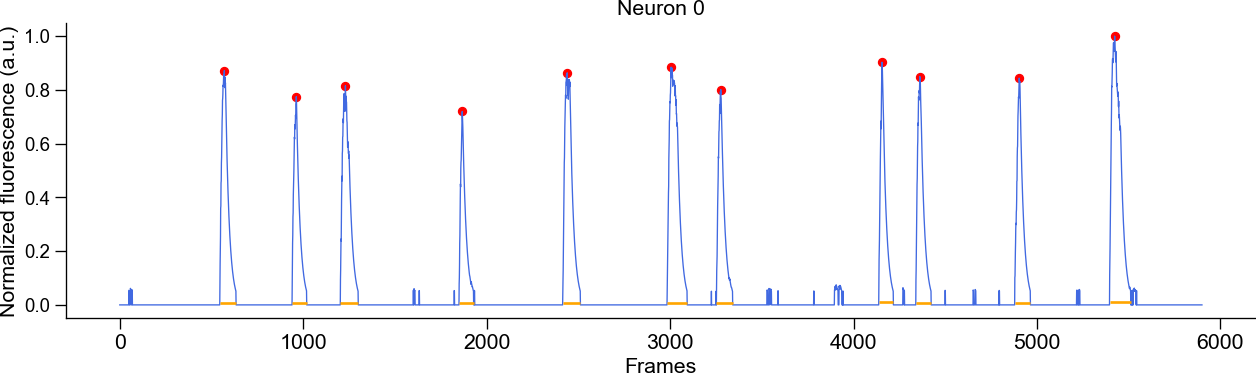

In [36]:
neuron = 0
fname = 'neuron_' + str(neuron)
ca.plot_catrace(neuron=neuron, fname=fname, save_folder='figures/')

## Calcium imaging feature outputs
----

Output the main calcium spike dataframe and save to a set folder. 

Each row in the df is a neuron, while each column is an individual spike detected. 

In [37]:
ca_peak_df = ca.return_caspikewidth_df(save_folder='test_df/')

ca_peak_df

The directory already exists for test_df/
saving to: test_df/test_traces.xlsx
saved


,spike_0,spike_1,spike_2,spike_3,spike_4,spike_5,spike_6,spike_7,spike_8,spike_9,spike_10,spike_11,spike_12,spike_13,spike_14,spike_15,spike_16,spike_17,spike_18
neuron_0,5.768722,5.184208,6.353966,5.184874,6.284163,7.12831,5.767785,5.182832,5.443287,5.574143,7.521718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuron_1,9.600169,3.572340,5.253014,5.707879,5.447044,6.35515,5.702442,6.156852,6.022093,5.705447,6.090994,5.121502,6.221502,5.961149,5.890888,5.700667,5.76756,6.091219,5.172041
